https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators - Reference Documentation

In [9]:
import pandas as pd

In [14]:
df=pd.read_csv('/content/NIFTY IT-01-07-2022-to-01-07-2023.csv')

In [32]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=4f3574ca6b774af28cec24551ac9c0dcb746f54e9c2dfcff0202061990bdf47d
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [16]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-Jul-22,27718.80,28151.00,27524.30,28064.25,17362585,2460.19
1,04-Jul-22,28084.25,28174.40,27643.65,27890.65,16524407,2554.89
2,05-Jul-22,28020.30,28233.05,27642.60,27695.15,22705381,3158.56
3,06-Jul-22,27778.65,28148.90,27628.55,28007.60,19427285,2706.18
4,07-Jul-22,28217.80,28459.25,28077.05,28196.35,17533750,2507.99


#Momentum Indicators

Awesome Oscillator

While indicators that show market sentiment and its trends are inherently “lagging”, oscillators not only confirm trends, but also predict possible impulses and movements. The Awesome Oscillator detects the prevalence of bullish or bearish forces in the market by comparing the recent momentum (5 bars) with the wider trend (34 bars): the 34-period SMA is subtracted from the 5-period SMA.

Moreover, the 34-period and 5-period simple moving averages are calculated not by closing prices, as is the case of many indicators, but by the midpoints of the bars (arithmetic averages of the highs and lows for the chosen timeframe).

MEDIAN PRICE = (HIGH+LOW)/2

AO = SMA(MEDIAN PRICE, 5)-SMA(MEDIAN PRICE, 34)

 https://www.ifcm.co.uk/ntx-indicators/awesome-oscillator

In [33]:


import matplotlib.pyplot as plt

# Calculate the Awesome Oscillator
df['AO'] = ta.momentum.ao(df['High'], df['Low'])


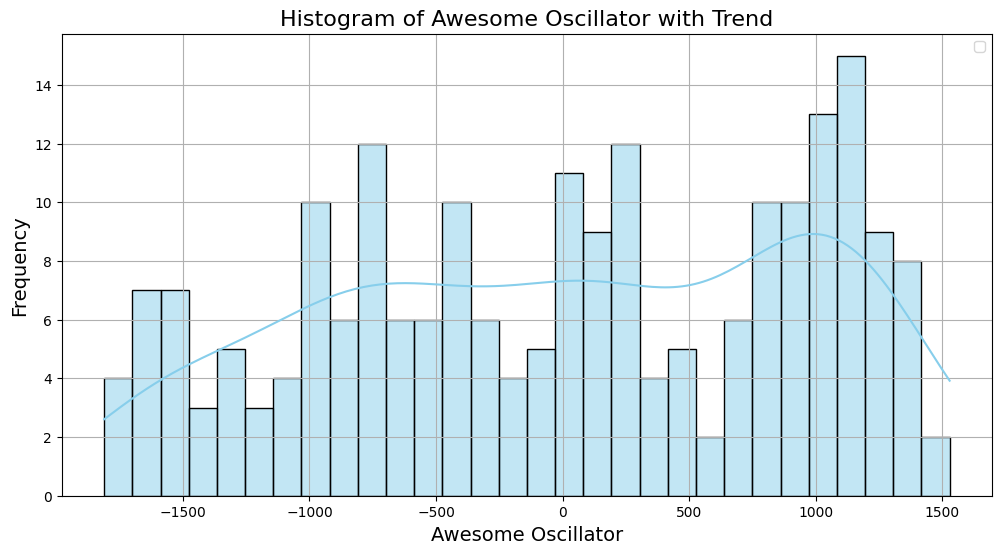

In [34]:

import seaborn as sns
# Plot the histogram with more advanced features
plt.figure(figsize=(12, 6))
sns.histplot(df['AO'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Customize the plot further
plt.xlabel('Awesome Oscillator', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Awesome Oscillator with Trend', fontsize=16)
plt.grid(True)
plt.legend()

plt.show()


#Positive values of the AO suggest that bullish forces are stronger than bearish forces, while negative values suggest the opposite.

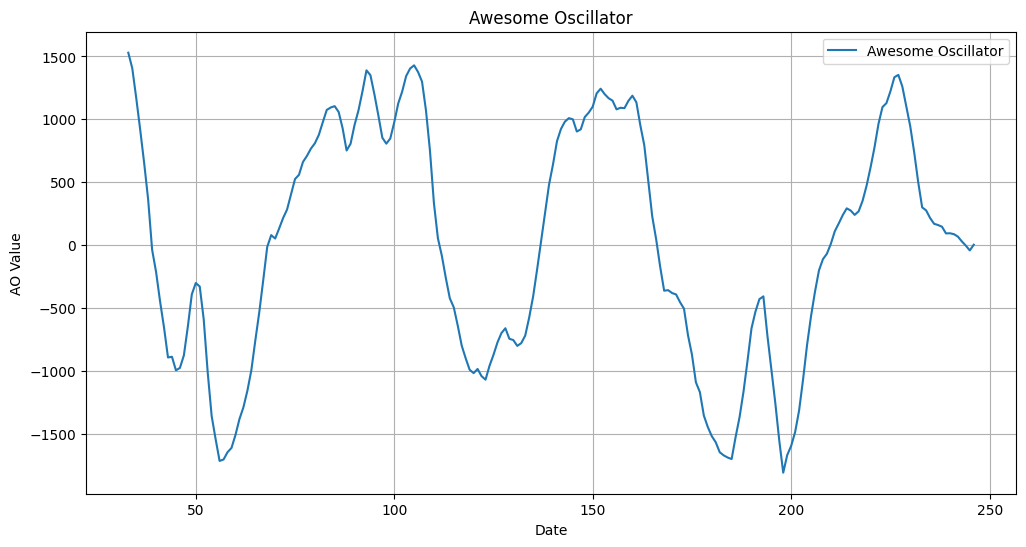

In [43]:
# Plot Awesome Oscillator
plt.figure(figsize=(12, 6))
plt.plot(df['AO'], label='Awesome Oscillator')
plt.xlabel('Date')
plt.ylabel('AO Value')
plt.title('Awesome Oscillator')
plt.legend()
plt.grid(True)
plt.show()


#KAMA Indicator

Kaufman's Adaptive Moving Average (KAMA) is an intelligent moving average that was developed by Perry Kaufman. The powerful trend-following indicator is based on the Exponential Moving Average (EMA) and is responsive to both trend and volatility. It closely follows price when noise is low and smooths out the noise when price fluctuates. Like all moving averages, the KAMA can be used to visualize the trend. Price crossing it indicates a directional change. Price can also bounce off the KAMA, which can act as dynamic support and resistance. It is often used in combination with other signals and analysis techniques.


In [47]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ta

# Assuming df is your DataFrame with 'Close' column

# Calculate KAMA and add it to the DataFrame
df['KAMA'] = ta.momentum.KAMAIndicator(df['Close'], window=10, pow1=2, pow2=30).kama()

1. Trend Following: KAMA attempts to follow the price trend closely while
smoothing out noise. It adapts to volatility changes in the market.
2. Price Crossings: When the price crosses above the KAMA, it signals a potential
bullish trend, while crossing below it indicates a potential bearish trend.
3. Dynamic Support/Resistance: The KAMA can also act as a dynamic support
and resistance level. The price might bounce off it, providing trading opportunities.

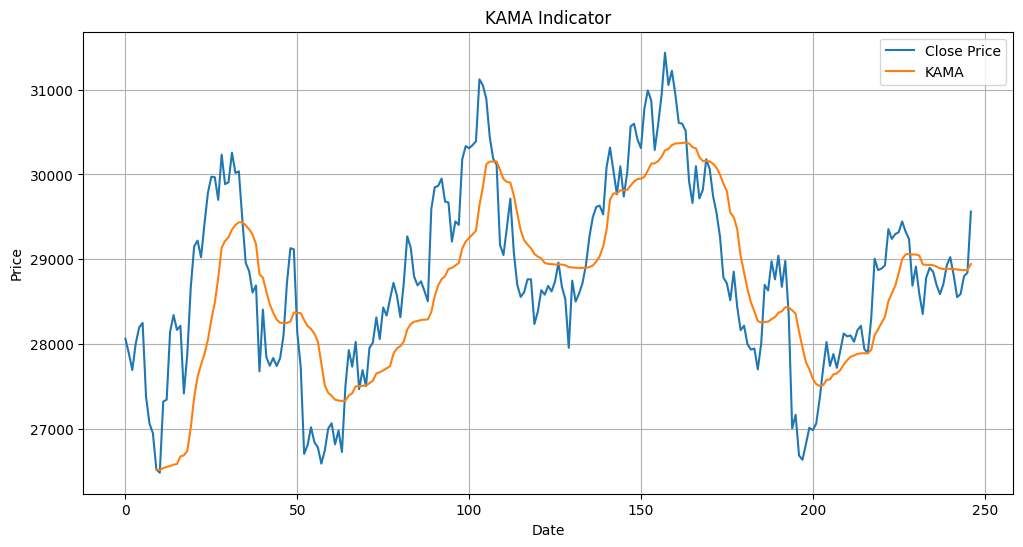

In [44]:

# Plot KAMA
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['KAMA'], label='KAMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KAMA Indicator')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
df['PPO']=ta.momentum.PercentagePriceOscillator(df['Close'],window_slow=10,window_fast=9,window_sign=9,fillna=False).ppo_signal()

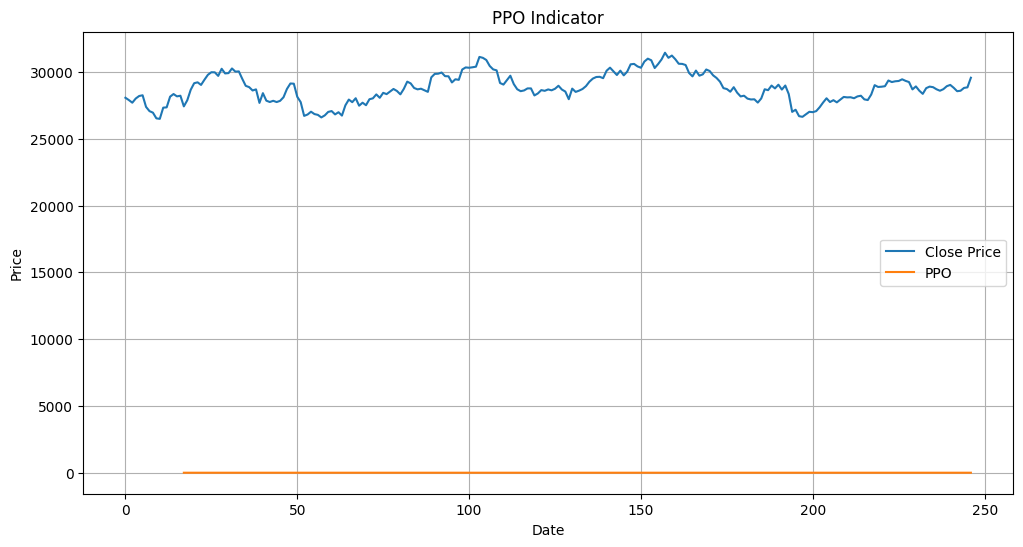

In [59]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['PPO'], label='PPO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PPO Indicator')
plt.legend()
plt.grid(True)
plt.show()




In [63]:
df['PVO']=ta.momentum.PercentageVolumeOscillator(df['Volume'],window_slow=10,window_fast=9,window_sign=9,fillna=False).pvo_hist()

KeyError: 'Shares Traded'

In [60]:


plt.figure(figsize=(12,6))
plt.plot(df['PVO'], label='PVO')
plt.xlabel('Date')
plt.ylabel('PVO Value')
plt.title('PVO Indicator')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'PVO'

<Figure size 1200x600 with 0 Axes>

The Rate-of-Change (ROC) indicator, which is also referred to as simply Momentum, is a pure momentum oscillator that measures the percent change in price from one period to the next. The ROC calculation compares the current price with the price “n” periods ago. The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change moves from positive to negative. As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings. Divergences fail to foreshadow reversals more often than not, so this article will forgo a detailed discussion on them. Even though centerline crossovers are prone to whipsaw, especially short-term, these crossovers can be used to identify the overall trend. Identifying overbought or oversold extremes comes naturally to the Rate-of-Change oscillator.

In [64]:
df['ROC']=ta.momentum.ROCIndicator(df['Close'],window=10,fillna=False).roc()

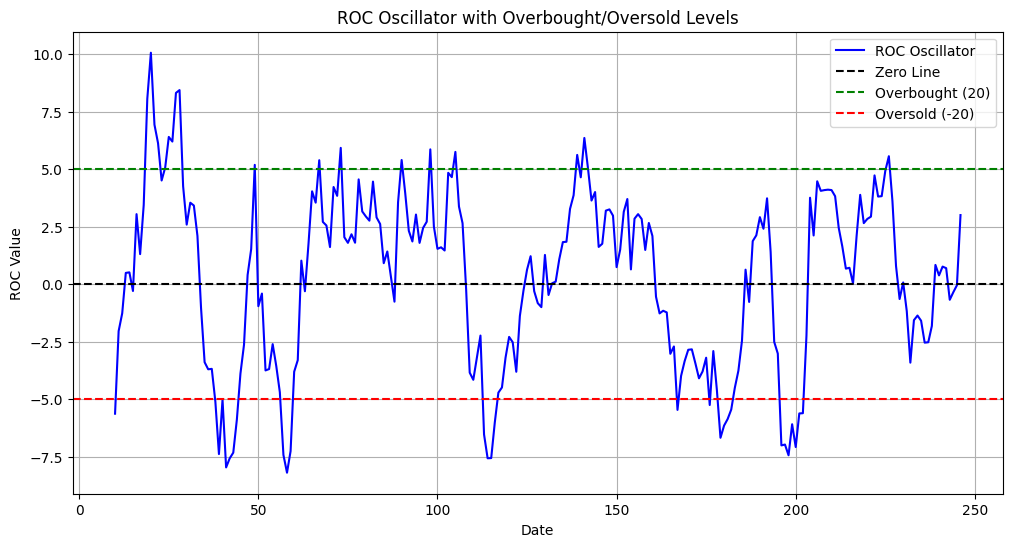

In [66]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['ROC'], label='ROC Oscillator', color='blue')
plt.axhline(0, color='black', linestyle='--', label='Zero Line')  # Add a horizontal line at 0

# Add overbought and oversold levels (you can adjust these values)
plt.axhline(5, color='green', linestyle='--', label='Overbought (20)')
plt.axhline(-5, color='red', linestyle='--', label='Oversold (-20)')

plt.xlabel('Date')
plt.ylabel('ROC Value')
plt.title('ROC Oscillator with Overbought/Oversold Levels')
plt.legend()
plt.grid(True)
plt.show()


The RSI provides technical traders with signals about bullish and bearish price momentum, and is often plotted below the graph of an asset’s price.

An asset is usually considered overbought when the RSI is above 70 and oversold when it is below 30.

The RSI line crossing below the overbought line or above the oversold line can be seen by traders as a signal to buy or sell.
The RSI works best in trading ranges rather than trending markets.

In [67]:
df['RSI']=ta.momentum.RSIIndicator(df['Close'],window=14,fillna=False).rsi()

In [69]:

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Reshape the RSI column for scaling
rsi_values = df['RSI'].values.reshape(-1, 1)

# Fit and transform the RSI values
scaled_rsi = scaler.fit_transform(rsi_values)

# Assign the scaled RSI values back to the DataFrame
df['Scaled_RSI'] = scaled_rsi

# Print the DataFrame with the scaled RSI column
print(df[['RSI', 'Scaled_RSI']])


           RSI  Scaled_RSI
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
242  46.626096    0.406462
243  47.373093    0.422779
244  51.643439    0.516059
245  52.489402    0.534538
246  63.923943    0.784310

[247 rows x 2 columns]


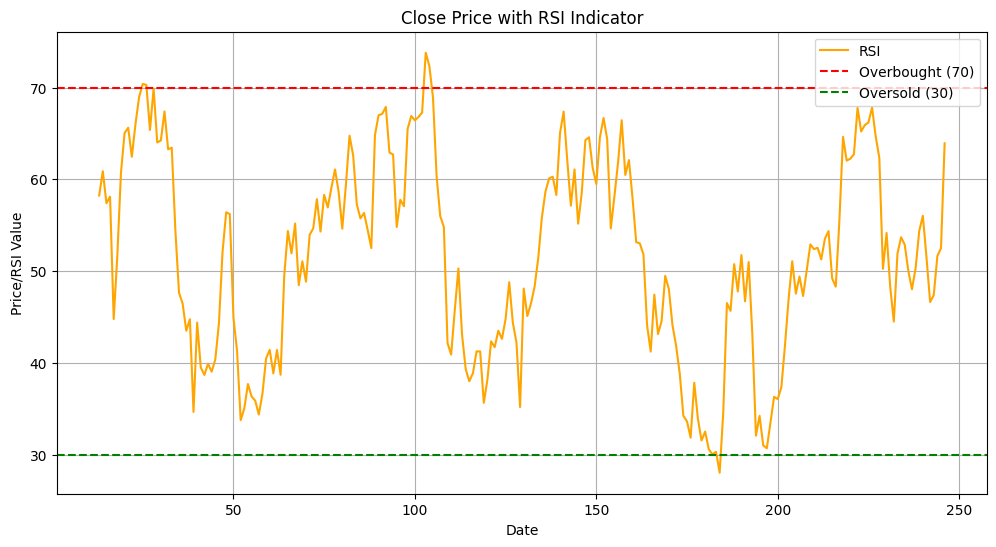

In [71]:


plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI', color='orange')

# Add overbought and oversold levels
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')


plt.xlabel('Date')
plt.ylabel('Price/RSI Value')
plt.title('Close Price with RSI Indicator')
plt.legend()
plt.grid(True)
plt.show()


#Stochastic RSI

StochRSI is an oscillator that measures the level of the RSI relative to its high-low range over a period. It provides a more sensitive indicator that can highlight overbought or oversold conditions in the market.

StochRSI is typically used to generate more frequent and timely trading signals compared with the traditional RSI.
StochRSI oscillates between 0 and 1, with readings above 0.8 typically considered overbought and below 0.2 considered oversold.

This indicator can help traders identify potential trend reversals, momentum shifts, and divergences between price and momentum.

Like all technical indicators, stochRSI should be used with other analysis tools and not relied upon exclusively for trading decisions.

https://www.investopedia.com/terms/s/stochrsi.asp - Reference Link



In [72]:
df['Stoch_RSI']=ta.momentum.StochRSIIndicator(df['Close'],window=14,fillna=False).stochrsi()

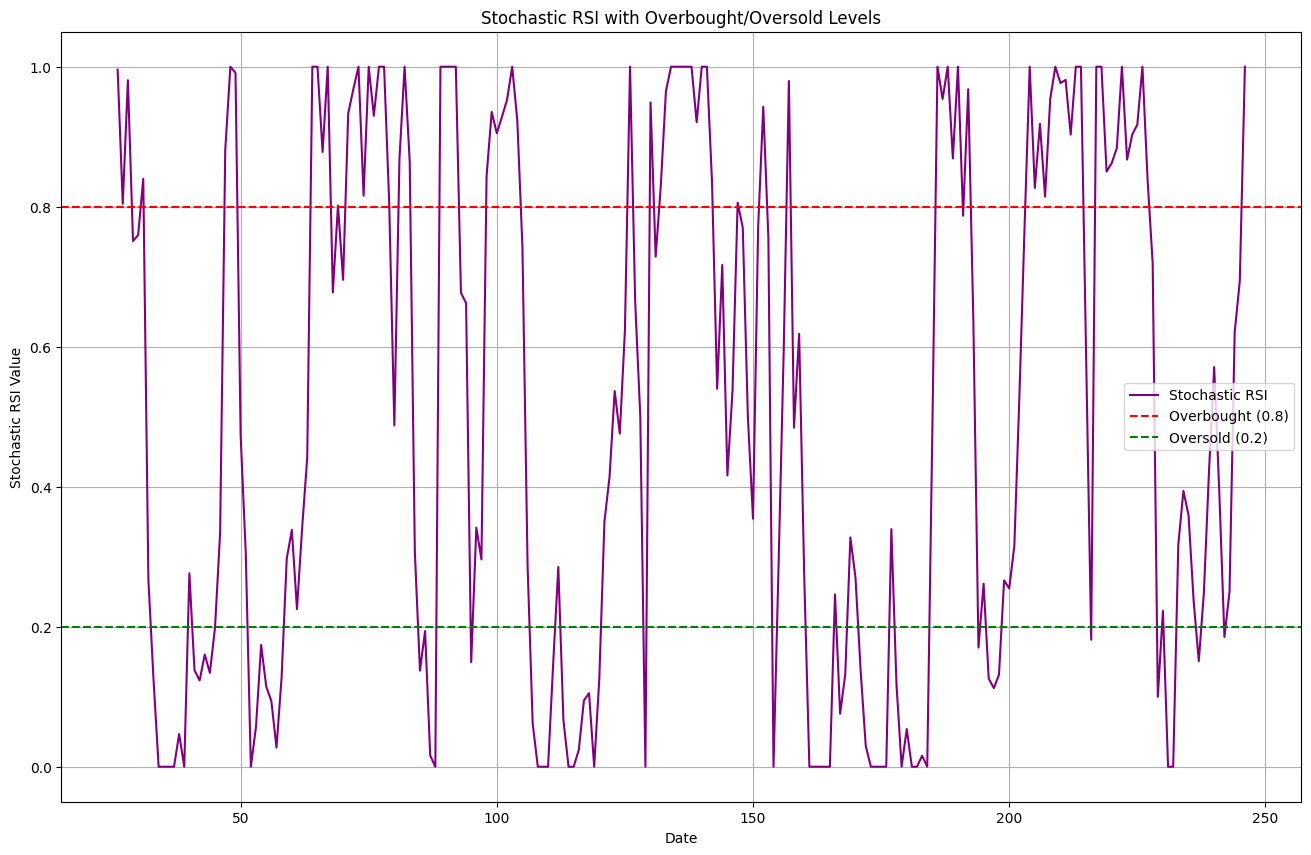

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.plot(df['Stoch_RSI'], label='Stochastic RSI', color='purple')

# Add overbought and oversold levels
plt.axhline(0.8, color='red', linestyle='--', label='Overbought (0.8)')
plt.axhline(0.2, color='green', linestyle='--', label='Oversold (0.2)')

plt.xlabel('Date')
plt.ylabel('Stochastic RSI Value')
plt.title('Stochastic RSI with Overbought/Oversold Levels')
plt.legend()
plt.grid(True)
plt.show()


## Stochastic Oscillator:
   - Measures the momentum of price changes by comparing the closing price to its
     price range over a period.
   - Helps identify overbought and oversold conditions, potential trend reversals, and
     divergence between price and momentum.
- Ranges from 0 to 100. Readings above 80 are considered overbought, and below 20 are considered oversold.

In [75]:
df['Stoch_oscillator']=ta.momentum.StochasticOscillator(df['High'],df['Low'],df['Close'],window=14,smooth_window=3,fillna=False).stoch()

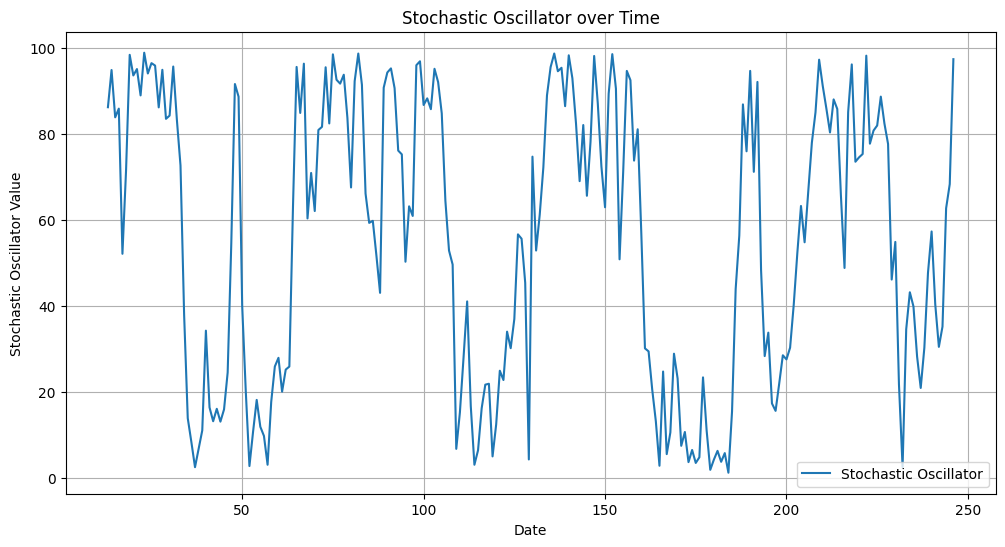

In [79]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Stoch_oscillator'], label='Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Stochastic Oscillator Value')
plt.title('Stochastic Oscillator over Time')
plt.legend()
plt.grid(True)
plt.show()



# TSI (True Strength Index) Indicator
The True Strength Index (TSI) is a momentum indicator that helps traders identify
overbought and oversold conditions and potential trend changes. It is designed to
smooth out price fluctuations and focus on the underlying trend.

The TSI is calculated by applying a double smoothing process to the price change
and volume. It measures the strength of the price movement in relation to its
recent history.

# Key Features:

 Identifies overbought and oversold levels: Signals potential trend reversals.

 Measures momentum: Helps gauge the strength and direction of the trend.

 Reduces noise: Double smoothing process minimizes the impact of short-term price
   fluctuations.

In [81]:
df['TSI']=ta.momentum.TSIIndicator(df['Close'],window_slow=25,window_fast=13,fillna=False).tsi()

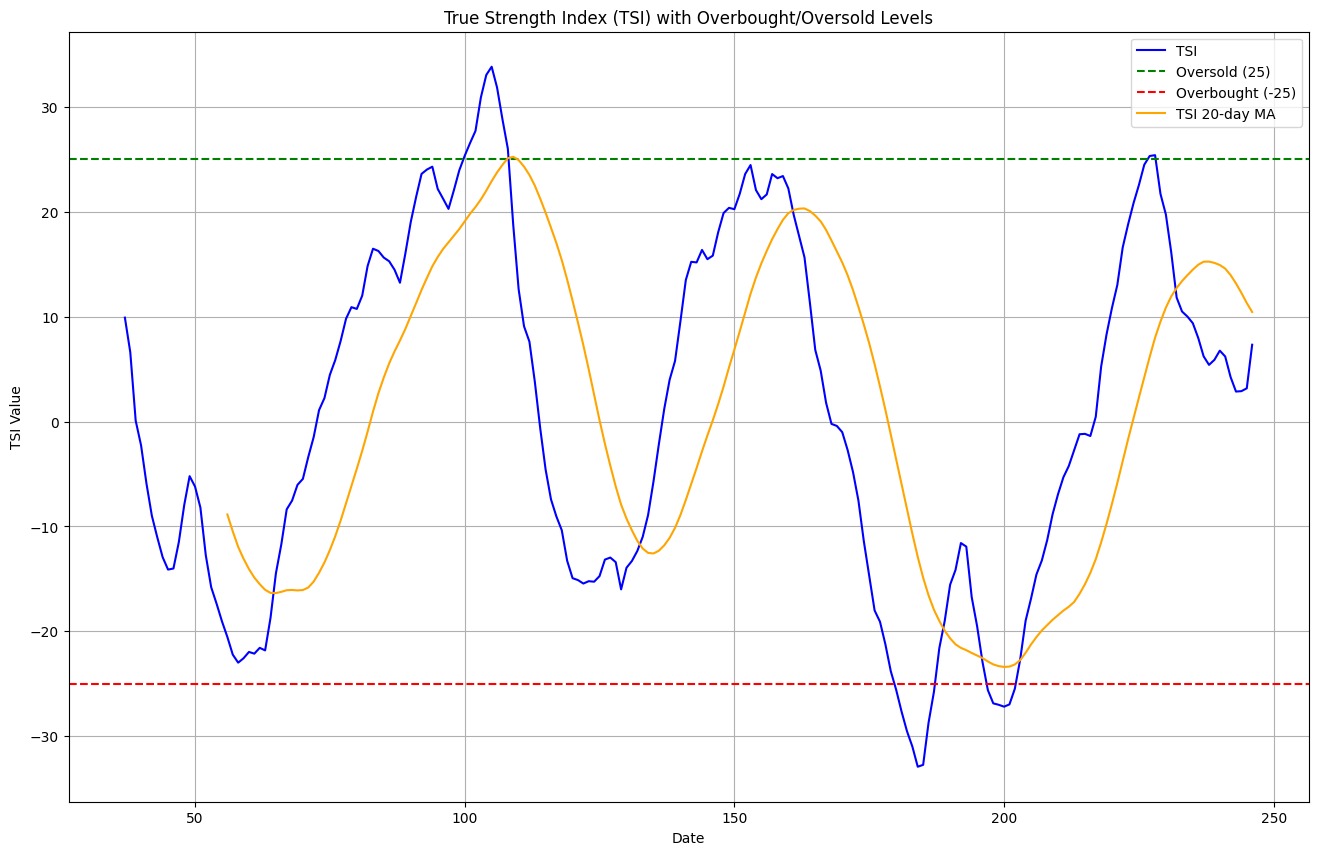

In [84]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))

# Plot TSI
plt.plot(df['TSI'], label='TSI', color='blue')
plt.xlabel('Date')
plt.ylabel('TSI Value')
plt.title('True Strength Index (TSI) with Overbought/Oversold Levels')
plt.legend()
plt.grid(True)

# Add overbought and oversold levels (adjust as needed)
plt.axhline(25, color='green', linestyle='--', label='Oversold (25)')
plt.axhline(-25, color='red', linestyle='--', label='Overbought (-25)')


# Add moving average of TSI
plt.plot(df['TSI'].rolling(window=20).mean(), label='TSI 20-day MA', color='orange')



# Customize plot further
plt.legend()
plt.show()


<Axes: xlabel='TSI', ylabel='Count'>

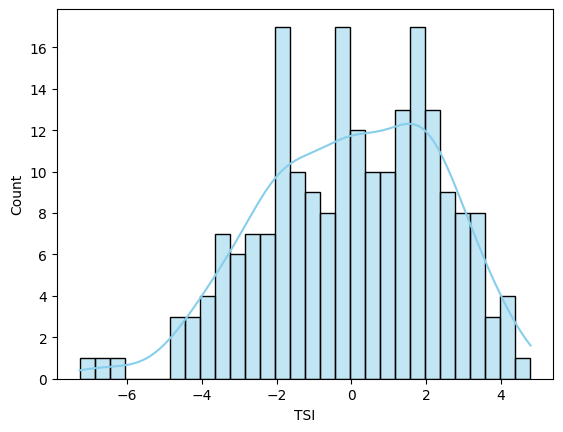

In [85]:
# Add histogram of TSI changes
sns.histplot(df['TSI'].diff(), bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.5, ax=plt.gca())

#Formula:

BP = Close - Minimum(Low, Prior Close)
TR = Maximum(High, Prior Close) - Minimum(Low, Prior Close)

Average 7 = Sum(BP * Weight) / Sum(TR * Weight) for the last 7 days.Average 14 = Sum(BP * Weight) / Sum(TR * Weight) for the last 14 days.

Average 28 = Sum(BP * Weight) / Sum(TR * Weight) for the last 28 days.

Ultimate Oscillator = 4 * Average 7 + 2 * Average 14 + Average 28 / 4 + 2 + 1

Where weight is 100 for the current day, 4 for the day before, 2 for 2 days before, 1 for the 3rd day before, and 0 for older days.

## Overbought/Oversold: The Ultimate Oscillator is considered overbought when it is above 70 and oversold when it is below 30. These levels can be adjusted to fit the trader's risk tolerance.

## Divergences: The Ultimate Oscillator can be used to identify divergences between price and momentum. A bullish divergence occurs when the price is making lower lows, but the Ultimate Oscillator is making higher lows. A bearish divergence occurs when the price is making higher highs, but the Ultimate Oscillator is making lower highs.

## Trend Confirmation: The Ultimate Oscillator can be used to confirm the direction of a trend. A rising Ultimate Oscillator suggests that the trend is bullish, while a falling Ultimate Oscillator suggests that the trend is bearish.

In [86]:
df['Ultimate Oscillator']=ta.momentum.UltimateOscillator(df['High'],
                                                         df['Low'],
                                                         df['Close'],
                                                         window1=7,
                                                         window2=14,
                                                         window3=28,
                                                         weight1=4.0,
                                                         weight2=2.0,
                                                         weight3=1.0,
                                                         fillna=False).ultimate_oscillator()

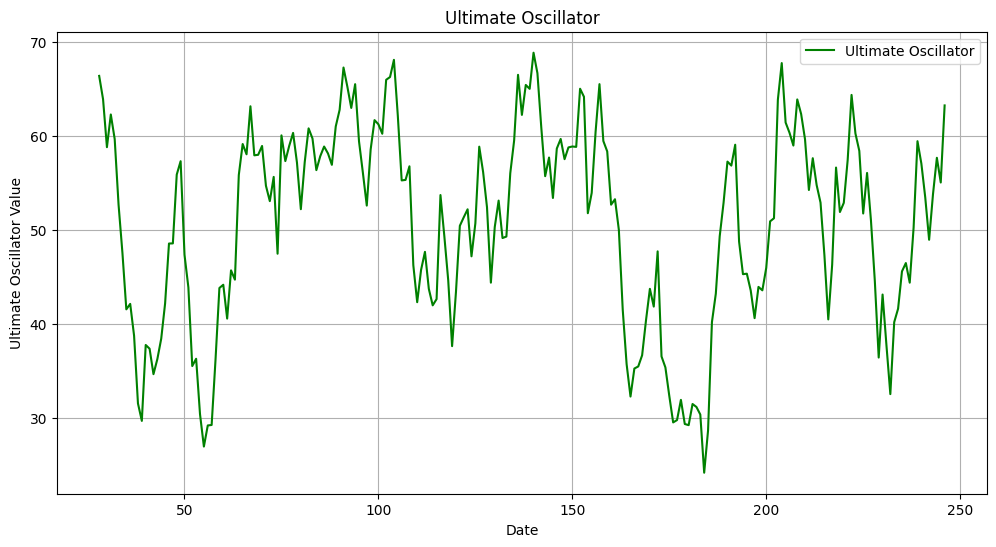

In [87]:


plt.figure(figsize=(12, 6))
plt.plot(df['Ultimate Oscillator'], label='Ultimate Oscillator', color='green')
plt.xlabel('Date')
plt.ylabel('Ultimate Oscillator Value')
plt.title('Ultimate Oscillator')
plt.legend()
plt.grid(True)
plt.show()


In [89]:


import plotly.graph_objects as go

# Create a candlestick chart with RSI and Stochastic Oscillator as subplots
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.add_trace(go.Scatter(x=df.index, y=df['Stoch_oscillator'], name='Stochastic Oscillator', yaxis='y3'))

fig.update_layout(
    title='NIFTY IT Stock with RSI and Stochastic Oscillator',
    yaxis=dict(title='Price'),
    yaxis2=dict(title='RSI', overlaying='y', side='right'),
    yaxis3=dict(title='Stochastic Oscillator', overlaying='y', side='left'),
    xaxis_rangeslider_visible=False
)

fig.show()


In [90]:


# Create a candlestick chart with RSI and Ultimate Oscillator as subplots
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.add_trace(go.Scatter(x=df.index, y=df['Ultimate Oscillator'], name='Ultimate Oscillator', yaxis='y2'))

fig.update_layout(
    title='NIFTY IT Stock with RSI and Ultimate Oscillator',
    yaxis=dict(title='Price'),
    yaxis2=dict(title='Ultimate Oscillator', overlaying='y', side='right'),
    xaxis_rangeslider_visible=False
)

fig.show()


#William Oscillator
###- Ranges from -100 to 0:
 - Readings near -100 suggest an oversold condition, indicating potential buying opportunities.
 - Readings near 0 suggest an overbought condition, indicating potential selling opportunities.

### - Identifies potential reversals:
  - When the Williams %R crosses above -80 from below, it indicates a possible bullish reversal.
  - When the Williams %R crosses below -20 from above, it indicates a possible bearish reversal.

### - Sensitivity to market fluctuations:
  - The indicator is sensitive to price fluctuations and can generate false signals in volatile markets.

### - Often used with other indicators:
 - Combining Williams %R with other indicators like RSI or MACD can provide a more comprehensive view of the market.

In [91]:
df['William_R']=ta.momentum.WilliamsRIndicator(df['High'],
                                               df['Low'],
                                               df['Close'],
                                               fillna=False).williams_r()

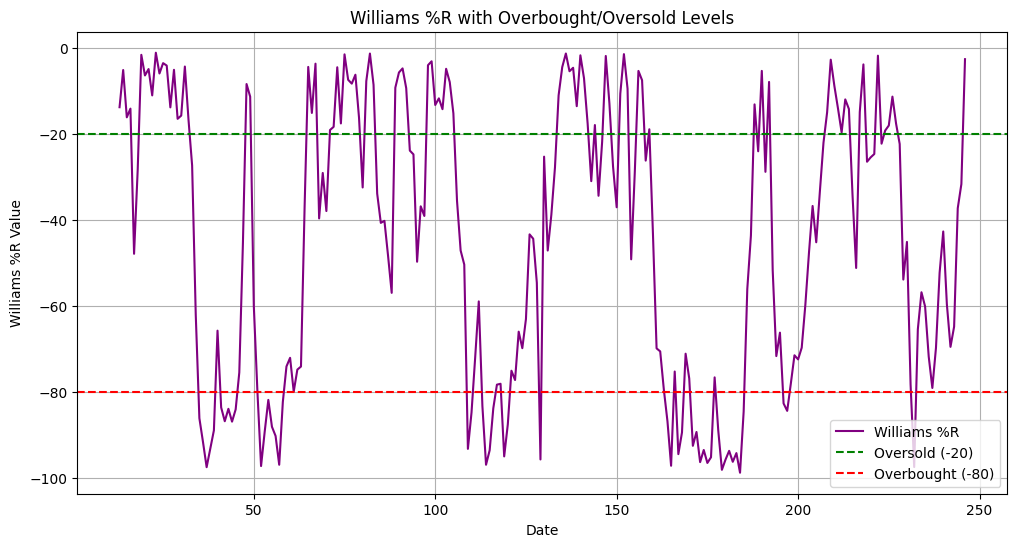

In [94]:


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['William_R'], label='Williams %R', color='purple')

# Add overbought and oversold levels
plt.axhline(-20, color='green', linestyle='--', label='Oversold (-20)')
plt.axhline(-80, color='red', linestyle='--', label='Overbought (-80)')

plt.xlabel('Date')
plt.ylabel('Williams %R Value')
plt.title('Williams %R with Overbought/Oversold Levels')
plt.legend()
plt.grid(True)
plt.show()


## Summary and Conclusion of Momentum Indicators


This analysis explored several momentum indicators applied to the NIFTY IT stock data, aiming to understand market trends and potential trading signals.


**Key Takeaways:**
- **Awesome Oscillator:** Useful for identifying bullish/bearish forces and potential trend changes.
- **KAMA:**  Adapts to volatility, provides dynamic support/resistance, and signals trend changes when price crosses it.
- **PPO:** Shows momentum and potential reversals with price and signal lines.
- **PVO:** Shows volume momentum and can be used to confirm trends.
- **ROC:**  Provides simple momentum measurement; centerline crossovers indicate trend, and extreme readings suggest overbought/oversold conditions.
- **RSI:** Tracks price momentum, signals overbought/oversold conditions and can confirm trend changes.
- **Stochastic RSI:**  More sensitive RSI variant, highlights overbought/oversold situations and potential reversals.
- **Stochastic Oscillator:**  Measures momentum by comparing closing price to its price range, and helps identify overbought/oversold conditions, potential reversals, and divergence between price and momentum.
- **TSI:**  Identifies potential trend changes, measures momentum, reduces noise with double smoothing, and identifies overbought and oversold levels.
- **Ultimate Oscillator:**  Similar to RSI, helps identify overbought/oversold conditions and potential trend changes;  also used for divergence analysis.
- **Williams %R:** Tracks momentum and identifies overbought/oversold conditions, potential reversals, and trading opportunities.


**Conclusion:**
Momentum indicators, when combined with other technical analysis tools and careful consideration of market context, provide valuable insights into market dynamics. However, it's crucial to remember that no indicator is perfect and false signals can occur. Traders should always use multiple indicators and strategies to make informed decisions and manage risk effectively.